Library Declaration

In [9]:
import numpy as np
import matplotlib.pyplot as plt


Dati da inserire

In [ ]:
# Dati iniziali
x_val_reg_length = 16  # Bits (Signed) ---> - 2**(14)-1 ; 2**(14)-1
offset_x_val_reg_Y_axis = np.array([30690, 9286, 2])  # OFFSET X_VAL_REG
offset_applied_uV_X_axis = np.array([0.0115, 0.0015, 0])  # OFFSET APPLIED in uV

# Curve fitting
polyn, residuals, _, _, _ = np.polyfit(
    offset_applied_uV_X_axis, offset_x_val_reg_Y_axis, 1, full=True
)
print(offset_applied_uV_X_axis[len(offset_applied_uV_X_axis) - 1])
print(polyn)
# polyn, residuals, _, _, _ = np.polyfit(offset_applied_uV_X_axis, offset_x_val_reg_Y_axis, 1, full=True)


In [ ]:
# Valori x per la valutazione della curva
offset_applied_uV_X_axis1 = np.arange(0, 0.10, 0.0001)
y1 = np.polyval(polyn, offset_applied_uV_X_axis1)

## print(y1)


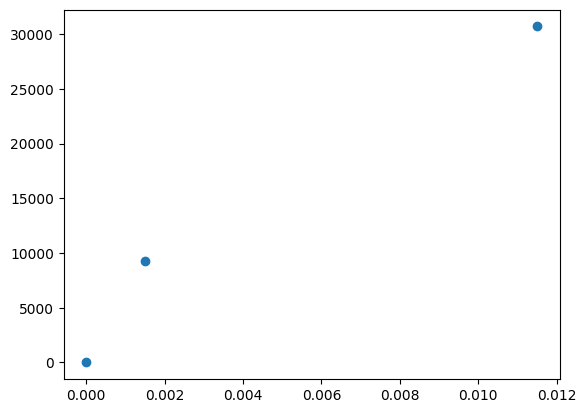

In [51]:
# Plotting
plt.figure()
plt.plot(offset_applied_uV_X_axis, offset_x_val_reg_Y_axis, "o")


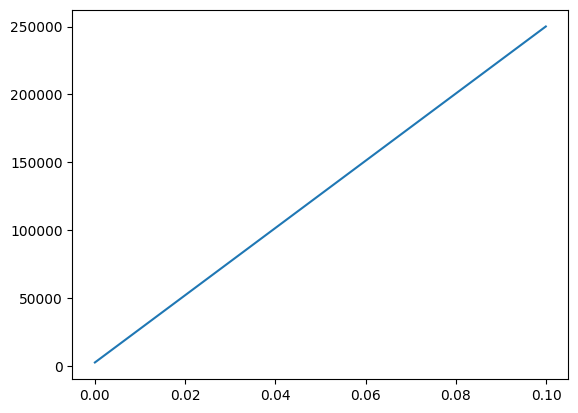

In [52]:
plt.figure()
plt.plot(offset_applied_uV_X_axis1, y1)
plt.show()


In [ ]:
offset_applied_uV_X_axis_for_evaluation = np.arange(0.0005, 0.015, 0.0005)  # MHz
offset_x_val_reg_Y_axis_1st_order = []
for x in offset_applied_uV_X_axis_for_evaluation:
    print("x:", x)
    y = polyn[len(polyn) - len(polyn)] * (x) ** (len(polyn) - 1) + polyn[-1]
    offset_x_val_reg_Y_axis_1st_order.append(y)


## Saturazione per la corretta visualizzazione
offset_x_val_reg_Y_axis_1st_order = np.array(offset_x_val_reg_Y_axis_1st_order)
print(offset_x_val_reg_Y_axis_1st_order)

for index, k in enumerate(offset_x_val_reg_Y_axis_1st_order):
    print("k:", k)
    if not (
        k >= -(2 ** (x_val_reg_length - 1)) - 1
        and k <= +(2 ** (x_val_reg_length - 1)) - 1
    ):
        offset_x_val_reg_Y_axis_1st_order[index] = 2 ** (x_val_reg_length - 1) - 1
        print(
            "Saturazione applicata per valore con indice:",
            index,
            " magnitude:",
            k,
            "offset in uV:",
            offset_applied_uV_X_axis_for_evaluation[index],
        )

print("offset_x_val_reg_Y_axis_1st_order:", offset_x_val_reg_Y_axis_1st_order)
